In [1]:
!pip install kaggle

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od


In [4]:
od.download("https://www.kaggle.com/datasets/omkargurav/face-mask-dataset")

Skipping, found downloaded files in ".\face-mask-dataset" (use force=True to force download)


In [5]:
import os


In [6]:
os.listdir()


['.ipynb_checkpoints',
 'digit_recognization.py',
 'face-mask-dataset',
 'face_mask.ipynb',
 'haarcascade_frontalface_default.xml',
 'kaggle.json',
 'Untitled.ipynb']

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('C:\\Users\\user\\Desktop\\python\\project\\face-mask-dataset\\data\\with_mask')
print(with_mask_files[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [9]:
without_mask_files = os.listdir(r'C:\Users\user\Desktop\python\project\face-mask-dataset\data\without_mask')
print(without_mask_files[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [10]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
labels = with_mask_labels + without_mask_labels
print(len(labels))


7553


In [12]:
with_mask_path = 'C:\\Users\\user\\Desktop\\python\\project\\face-mask-dataset\\data\\with_mask\\'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = 'C:\\Users\\user\\Desktop\\python\\project\\face-mask-dataset\\data\\without_mask\\'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\Users\user\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
X = np.array(data)
Y = np.array(labels)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#converting to vector
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [19]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 65s 366ms/step - loss: 0.4277 - acc: 0.8118 - val_loss: 0.2711 - val_acc: 0.8860
Epoch 2/5
170/170 [==============================] - 58s 343ms/step - loss: 0.2923 - acc: 0.8920 - val_loss: 0.2478 - val_acc: 0.8959
Epoch 3/5
170/170 [==============================] - 58s 342ms/step - loss: 0.2298 - acc: 0.9132 - val_loss: 0.2119 - val_acc: 0.9306
Epoch 4/5
170/170 [==============================] - 58s 342ms/step - loss: 0.1932 - acc: 0.9240 - val_loss: 0.1919 - val_acc: 0.9388
Epoch 5/5
170/170 [==============================] - 57s 337ms/step - loss: 0.1613 - acc: 0.9393 - val_loss: 0.1802 - val_acc: 0.9438


In [20]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 4s 84ms/step - loss: 0.1675 - acc: 0.9265
Test Accuracy = 0.9265387058258057


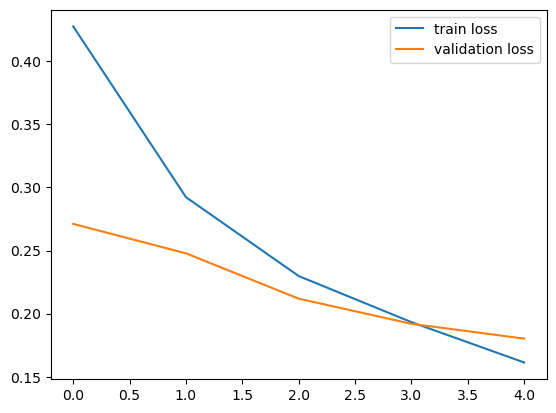

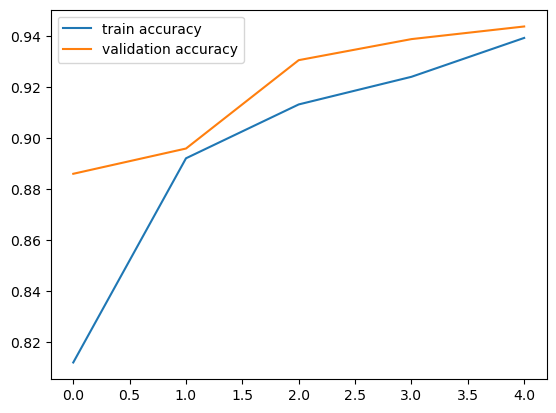

In [21]:
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [23]:
import cv2
path = "C:\\Users\\user\\Desktop\\python\\project\\haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)
img = np.zeros((500,500))
text = "Some text in the box"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords =((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness = 1)

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcame")

while True:
    (ret, input_image) = cap.read()
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = input_image[y:y+h, x:x+w]
        cv2.rectangle(input_image, (x,y), (x+w, y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print('Face is not detected')
            
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex +ew]

                input_image_rezised = cv2.resize(face_roi, (128,128))
                input_image_scaled = input_image_rezised/255
                input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
                input_prediction = model.predict(input_image_reshaped)
                print(input_prediction)
                prediction = np.argmax(input_prediction)
                print(prediction)
                
    


                font = cv2.FONT_HERSHEY_PLAIN
                font_scale = 1.5
  
                if (prediction == 0):
                    status = "Face Mask"
    
                    x1,y1,w1,h1 = 0,0,175,75
                    cv2.rectangle(input_image, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
                    cv2.putText(input_image, status, (x1 + int(w1/10), int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    cv2.putText(input_image, status,(100,150),font, 3,(0, 0, 255), 2, cv2.LINE_4)
                    cv2.rectangle(input_image, (x, y), (x+w, y+h), (0, 255,0))
                     
                else:

                    status = "No Mask"
                    x1,y1,w1,h1 = 0,0,175,75
                    cv2.rectangle(input_image, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
                    cv2.putText(input_image, status, (x1 + int(w1/10), int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    cv2.putText(input_image, status,(100,150),font, 3,(0, 0, 255), 2, cv2.LINE_4)
                    cv2.rectangle(input_image, (x, y), (x+w, y+h), (0, 255,0))
                
                cv2.imshow("Video", input_image)
                if cv2.waitKey(2) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 69ms/step
[[0.28326884 0.8035508 ]]
1
1/1 [==============================] - 0s 28ms/step
[[0.32192025 0.7511438 ]]
1
1/1 [==============================] - 0s 39ms/step
[[0.3307136  0.73912156]]
1
1/1 [==============================] - 0s 39ms/step
[[0.29387116 0.79057306]]
1
1/1 [==============================] - 0s 55ms/step
[[0.2896745 0.8007842]]
1
1/1 [==============================] - 0s 52ms/step
[[0.27932397 0.80732596]]
1
1/1 [==============================] - 0s 45ms/step
[[0.28129855 0.797426  ]]
1
1/1 [==============================] - 0s 34ms/step
[[0.24538153 0.83561367]]
1
1/1 [==============================] - 0s 45ms/step
[[0.246939   0.83728725]]
1
1/1 [==============================] - 0s 30ms/step
[[0.22444403 0.85153896]]
1
1/1 [==============================] - 0s 72ms/step
[[0.30292842 0.7727335 ]]
1
1/1 [==============================] - 0s 68ms/step
[[0.28383076 0.79334456]]
1
1/1 [==============================] - 0s 

KeyboardInterrupt: 